# 新词分析 #

In [61]:
%matplotlib inline
%matplotlib notebook
%pylab inline
#pylab.rcParams['figure.figsize'] = (40, 20)
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

import numpy as np
import matplotlib.ticker as ticker

dataPath = "./"
newWordFile = dataPath + "new.info"
unknowFile = dataPath + "unknown.info"
src = pd.read_csv(newWordFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])
dis = pd.read_csv(newWordFile+"Dis", sep="\\s+", names=["word", "length", "pos", "tf", "pmi", "le", "re"])
src0 = pd.read_csv(unknowFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])
dis1 = pd.read_csv(unknowFile+"Dis", sep="\\s+", names=["word", "length", "pos", "tf", "pmi", "le", "re"])

def countplot(data):
    ax = sns.countplot(data)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')

Populating the interactive namespace from numpy and matplotlib


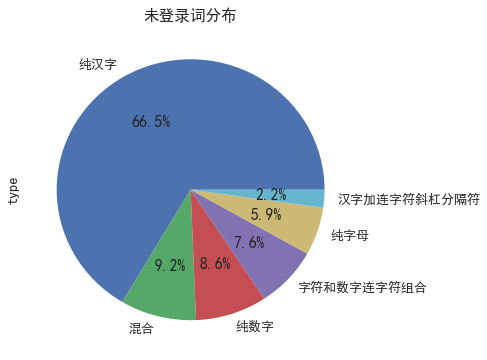

In [62]:
src0["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("未登录词分布")

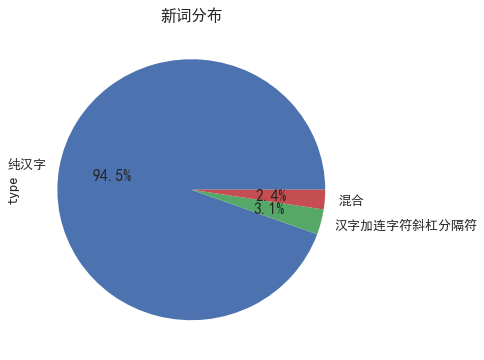

In [63]:
src["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")

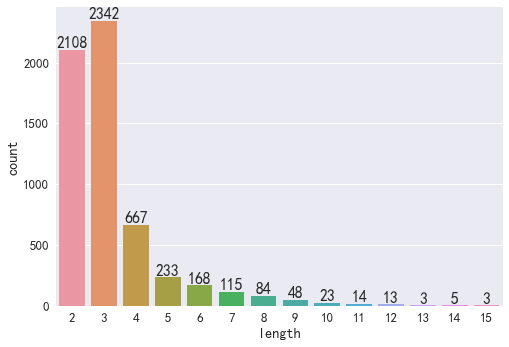

In [64]:
ax = sns.countplot(src["length"])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')

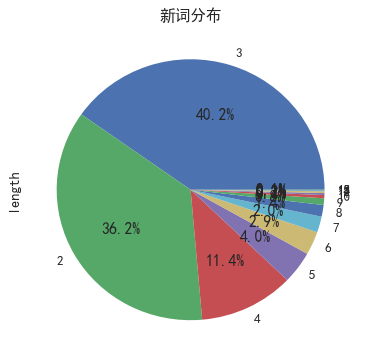

In [65]:
src["length"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")

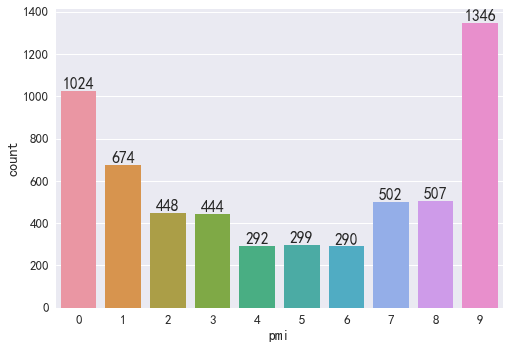

In [66]:
countplot(dis["pmi"]);

# 新词词频

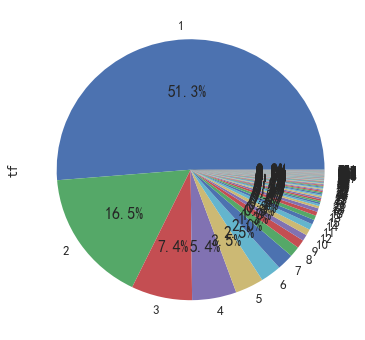

In [67]:
src["tf"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')

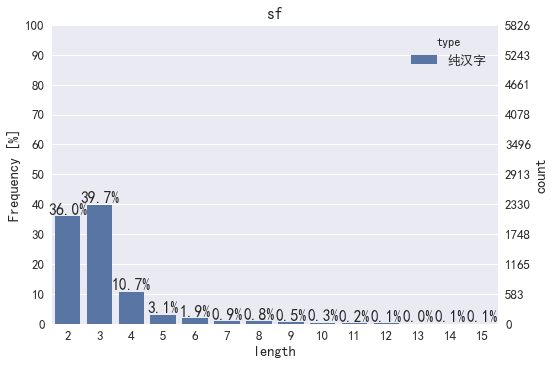

In [68]:
ax=sns.countplot(x="length", hue="type", data=src[src["type"].str.contains("纯汉字")])
ax.set_title("sf")

ncount = len(src["type"])

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

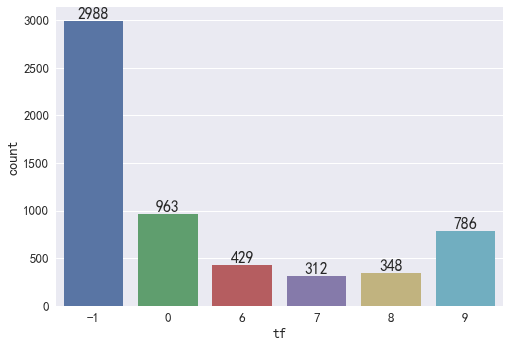

In [69]:
countplot(dis["tf"])

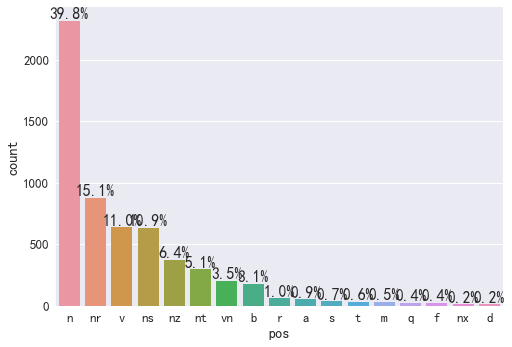

In [70]:
tmp = src.groupby('pos').filter(lambda x: len(x) > 10)
ax = sns.countplot(tmp["pos"], order=tmp.groupby('pos').size().sort_values(ascending=False).index)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100. * y/ncount), (x.mean(), y), ha='center', va='bottom')

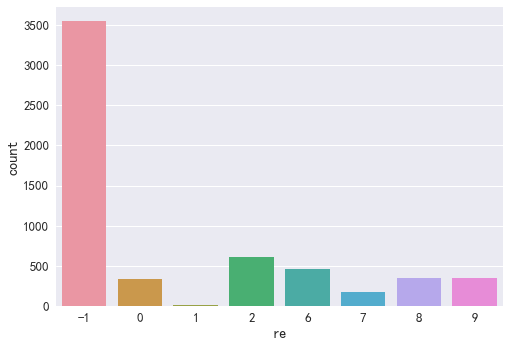

In [71]:
sns.countplot(dis["re"])

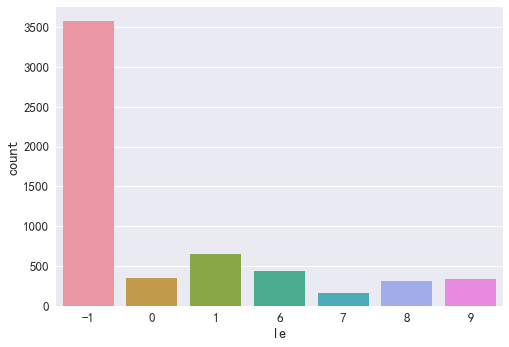

In [72]:
sns.countplot(dis["le"])

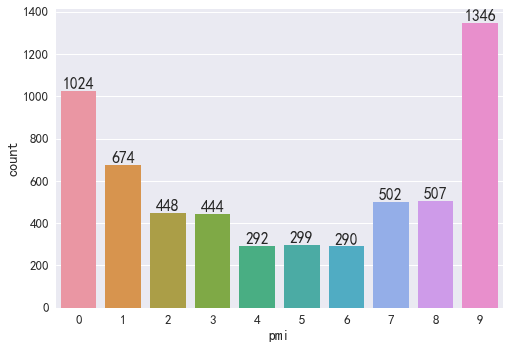

In [73]:
countplot(dis["pmi"])

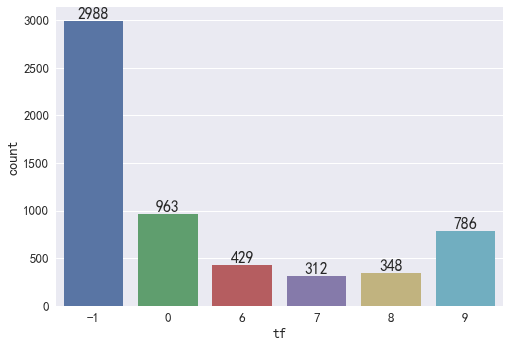

In [74]:
countplot(dis["tf"])

In [14]:
# src["pos"][src.groupby("pos").count() < 10]
src.groupby('pos').filter(lambda x: len(x) <= 12)

,word,type,length,pos,tf,pmi,le,re
234,既而,纯汉字,2,c,1,4.247928,0.000000,0.000000
261,尽管如此,纯汉字,4,c,5,10.546894,0.721928,0.000000
331,丛林地,纯汉字,3,u,1,7.087463,0.000000,0.000000
619,以致于,纯汉字,3,c,1,8.951285,0.000000,0.000000
706,而非,纯汉字,2,c,12,5.554589,1.584963,3.418296
1302,歼－１５,混合,4,nx,6,8.257388,1.792481,1.792481
1592,之于,纯汉字,2,p,1,-Infinity,0.000000,0.000000
1608,迄未,纯汉字,2,d,1,8.060696,0.000000,0.000000
1741,更是,纯汉字,2,d,21,4.000000,3.744239,4.201841
1797,野心勃勃,纯汉字,4,z,1,12.878817,0.000000,0.000000
